In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from skimage.morphology import opening, closing, disk

In [17]:
in_dir = 'data/'
in_file = 'ex6_ImagData2Load.mat'
data = sio.loadmat(in_dir + in_file)
ImgT1 = data['ImgT1']
ImgT2 = data['ImgT2']
ROI_GM = data['ROI_GM'].astype(bool)
ROI_WM = data['ROI_WM'].astype(bool)

**Exercise 1**

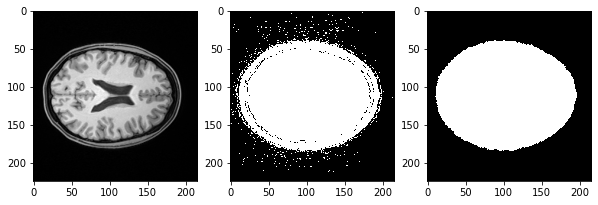

In [28]:
mask_init = ImgT1 > 10
mask = opening(mask_init, disk(2))
mask = closing(mask, disk(3))

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 10))
axs[0].imshow(ImgT1, cmap = 'gray')
axs[1].imshow(mask_init, cmap = 'gray', interpolation = 'none')
axs[2].imshow(mask, cmap = 'gray', interpolation = 'none')
plt.show()

In [25]:
def my_show_1D_histogram(img, mask, img_name, axs):
    axs[0].imshow(img, cmap = 'gray')
    axs[0].set_title(img_name)
    axs[0].set_axis_off()

    intensities = img[mask]
    axs[1].hist(intensities, bins = 100)
    axs[1].set_title(f'1D Histogram {img_name}')
    axs[1].set_xlabel('Intensities')
    axs[1].set_ylabel('Frequency')

    return intensities

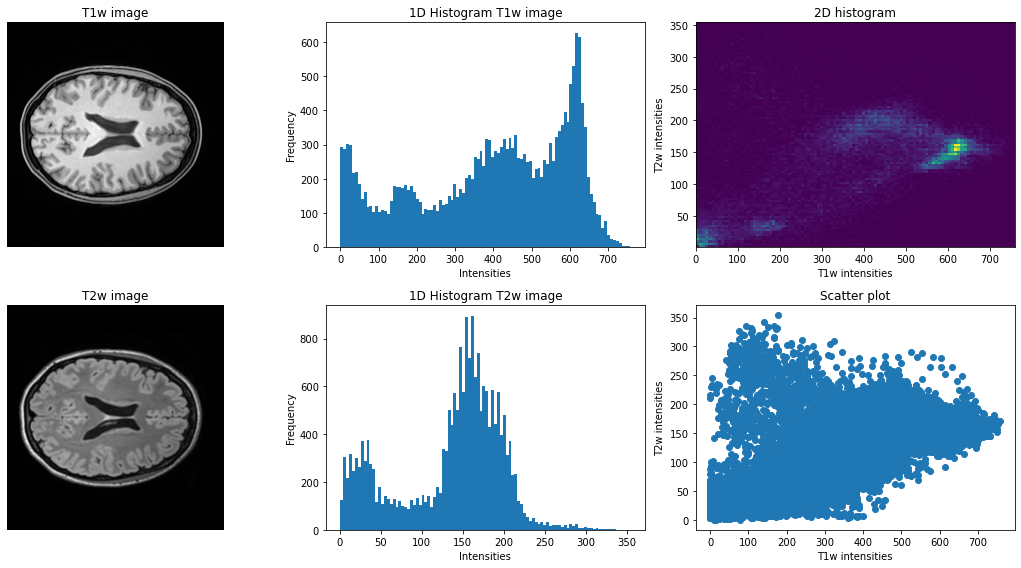

In [26]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 8))
T1_intensities = my_show_1D_histogram(ImgT1, mask, 'T1w image', axs[0, 0:2])
T2_intensities = my_show_1D_histogram(ImgT2, mask, 'T2w image', axs[1, 0:2])
axs[0,2].hist2d(T1_intensities, T2_intensities, bins = 100)
axs[0,2].set_xlabel('T1w intensities')
axs[0,2].set_ylabel('T2w intensities')
axs[0,2].set_title('2D histogram')

axs[1,2].scatter(T1_intensities, T2_intensities)
axs[1,2].set_xlabel('T1w intensities')
axs[1,2].set_ylabel('T2w intensities')
axs[1,2].set_title('Scatter plot')
plt.tight_layout()
plt.show()
plt.show()

Q1: What is the intensity threshold that can separate the GM and WM classes (roughly) from the 1D histograms?

T1w = 500
T2w = 160

Q2: Can the GM and WM intensity classes be observed in the 2D histogram and scatter plot?

**Exercise 2**

mask_T1w = 500
C1 = ImgT1 > mask_T1w
plt.hist(C1)